# Logistic regression 

In this part of the exercise, we will build a logistic regression model to predict whether a student gets admitted into a university.

the data we will work with has two features :

1- score in the first exam. 

2- score in the second exam.

and the label is admissions decision.

the tools we will use:

- `pandas` to load data 

- `numpy` to work with arrays 

- `matplotlib` to visualize data 

- `scipy.optimize` to find theta values for our cost function 


**first** we will use `pandas` to load data :

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin_bfgs
%matplotlib inline 

dataset = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admission'])
print(dataset.shape)
print(dataset.head())

(100, 3)
       exam1      exam2  admission
0  34.623660  78.024693          0
1  30.286711  43.894998          0
2  35.847409  72.902198          0
3  60.182599  86.308552          1
4  79.032736  75.344376          1


## Visualizing the data 

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

we will use 2-dimensional plot where the axes are the two exam scores, and the positive and
negative examples are shown with different markers.

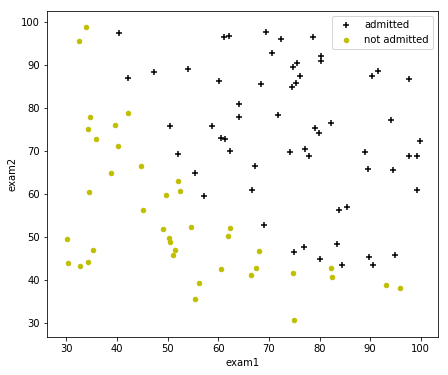

In [2]:
pos = dataset[(dataset['admission'] == 1)]
neg = dataset[(dataset['admission'] == 0)]
figure = plt.figure(figsize=(7, 6))
ax = figure.gca()
pos.plot.scatter(x='exam1', y='exam2', ax=ax, c='k', s=40,
                 marker='+', label='admitted')
neg.plot.scatter(x='exam1', y='exam2', ax=ax, c='y',
                 marker='o', label='not admitted')
plt.legend()
plt.show()

## implementation 

for logistic regression The hypothesis is defined as:

h(x) = g(theta\` * x) 

where g is the sigmoid function 

g(z) = 1/(1+e^(-z))

so first we will need to implement this function so we can use it later


In [3]:
def sigmoid(value):
    exp = np.exp(-value)
    denominator = np.add(1, exp)
    return np.divide(1, denominator)

## Cost function and gradient 

Now you will implement the cost function and gradient for logistic regression.

**Note** 

the cost function in logistic regression is:

J(θ) = (1 / m) ∑ \[(-y (log(y')) - (1 - y)(log(1 - y'))\] 

where y' is the hypothesis 

and the gradient of the cost :

gradient = (1 / m) ∑(y' - y) X 

**Note** to use dot product you must make sure that the number of columns in the first array equal to the number of rows in the second array , to achieve this we use ` .transpose()` method from `numpy`

In [4]:
def cost(x, y, theta):
    pre_y = sigmoid(np.dot(x, theta.transpose()))
    cost = (1 / m) * sum([(np.dot(-y.transpose(), np.log(pre_y)) - 
                          np.dot((1 - y).transpose(), np.log(1 - pre_y)))])
    return cost

def gradient(x, y, theta):
    pre_y = sigmoid(np.dot(x, theta.transpose()))
    grad = (1 / m) * np.dot((pre_y - y).transpose(), x)
    return grad

## Learning parameters using fmin_bfgs

in this part we will use `fmin_bfgs` from `scipy` to find optimal parameters

[to read more about scipy.optimize.fmin_bfgs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html)

first we will prepare our features and label to feed it to this function 

- first we will add another dimension to our data to accommodate the theta0 intercept term. 

- intialize theta values to zeros 

- we will define two functions ( `costfun` , `gradfun`) that take theta as parameter and return our cost and gradient function.

- we will give `costfun`, `gradfun` and intial theta values to `fmin_bfgs` function then print optimal theta values 


**Note** we initialized max iteration to 400 so that `fmin_bfgs` will run for at most 400 steps before it terminates.


**Note**  our objective function is cost function to be minimized


In [5]:
features = np.array(dataset[['exam1', 'exam2']])
label = np.array(dataset['admission'])


# intialize theta values
theta_init = np.zeros((1, features.shape[1] + 1),
                       dtype='float64')

# add another dimention
features = np.concatenate([np.ones((features.shape[0], 1),
                                   dtype='float64'),
                           features], axis=1)

m = features.shape[0]


def costfun(theta_init):
    return cost(features, label, theta_init)


def gradfun(theta_init):
    return gradient(features, label, theta_init)


print(fmin_bfgs(costfun, x0=theta_init, fprime=gradfun, maxiter=400))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
[-25.16133284   0.2062317    0.2014716 ]


**Note** the function found optimal theta values after 23 iterations

## Evaluating logistic regression 

After learning the parameters, you can use the model to predict whether a
particular student will be admitted.

now we will fit the model to our features , then we will implement `predict` function that takes the hypothesis values, threshold and returns 0 or 1 


In [6]:
optimal_theta = np.array([-25.16133284, 0.2062317, 0.2014716])
h_theta = sigmoid(np.dot(features, optimal_theta.transpose()))

def predict(pre_y, threshold):
    return np.array([1 if x > threshold else 0 for x in pre_y])

prediction = predict(h_theta, 0.5)

print(prediction[:5])



[0 0 0 1 1]


now we will report the training accuracy of the classifier by computing the
percentage of examples it got correct.


In [7]:
correct = 0 
total = 0 

for idx in range(label.shape[0]):
    if prediction[idx] == label[idx]:
        correct +=1 
    total += 1
accuracy = (correct / total) * 100

print('Accuracy = %0.2f' %accuracy)


Accuracy = 89.00


so our accuracy is 89% it means that our classifier misclassified just 11% of the cases! 

now we will visualize our classifier with our data to see how good it fits

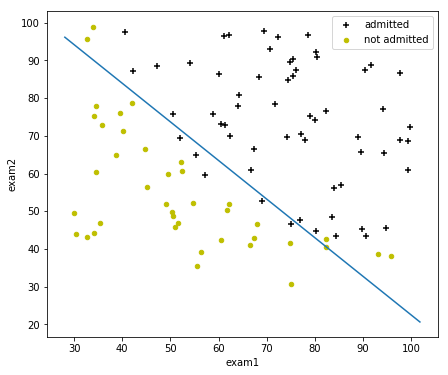

In [8]:
pos = dataset[(dataset['admission'] == 1)]
neg = dataset[(dataset['admission'] == 0)]
figure = plt.figure(figsize=(7, 6))
ax = figure.gca()

pos.plot.scatter(x='exam1', y='exam2', ax=ax, c='k', s=40,
                 marker='+', label='admitted')
neg.plot.scatter(x='exam1', y='exam2', ax=ax, c='y',
                 marker='o', label='not admitted')

plot_x = np.array([min(features[:, 1]) - 2,  max(features[:, 1]) + 2])
plot_y = (-1 / optimal_theta[2]) * (optimal_theta[1] * plot_x + optimal_theta[0])

ax.plot(plot_x, plot_y)

plt.legend()
plt.show()